# Classification Practice Problem (20 points)

In this notebook, we are going to work on a classification problem. You will learn how to build and train a classification model using PyTorch and sklearn.

We will use a protein expression dataset in this problem. Each data point in the dataset contains 77 features and a discrete target (from 0 - 7). Our goal is to train a model that classifies each sample into one of the eight classes.

First run the following cell to download the data. We will train our model on the training data and make predictions on the test set. The prediction results will be used for grading.

Note that you need to fill in all the code blocks marked with `TODO`.

In [8]:
!wget https://drive.google.com/uc\?export\=download\&id\=19fnRITF70H7At_lkYmDXqi-HZZsNcgjU -O cls_test.csv
!wget https://drive.google.com/uc\?export\=download\&id\=1rgGECKsFQ03InMDsle1qgqSqQMMUGNyt -O cls_train.csv

--2025-02-06 22:08:10--  https://drive.google.com/uc?export=download&id=19fnRITF70H7At_lkYmDXqi-HZZsNcgjU
Resolving drive.google.com (drive.google.com)... 142.250.141.138, 142.250.141.100, 142.250.141.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19fnRITF70H7At_lkYmDXqi-HZZsNcgjU&export=download [following]
--2025-02-06 22:08:10--  https://drive.usercontent.google.com/download?id=19fnRITF70H7At_lkYmDXqi-HZZsNcgjU&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182540 (178K) [application/octet-stream]
Saving to: ‘cls_test.csv’

cls_test.csv        100%[===================>] 178.26K  --.-KB/s 

In [9]:
# export
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import feature_selection
from sklearn.decomposition import PCA
import random

First load the data and take a look at the features and target.

In [10]:
df = pd.read_csv('cls_train.csv')
print(df.head())

#define X and Y
X = df.iloc[:,0:77]
# Fill NaN values with the mean value
X = X.fillna(X.mean(), inplace=False)
Y = df.iloc[:,77]
X = X.to_numpy()
Y = Y.to_numpy()
print(f'X: {X.shape}, Y: {Y.shape}')

   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
1  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578  0.176233   
2  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834  0.179668   
3  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222  0.167778   
4  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649  0.188093   

   pCAMKII_N   pCREB_N    pELK_N  ...  BCL2_N     pS6_N   pCFOS_N     SYP_N  \
0   2.292150  0.226972  1.596377  ...     NaN  0.106592  0.104315  0.441581   
1   2.141282  0.195188  1.442398  ...     NaN  0.106476  0.109446  0.439833   
2   2.007985  0.189803  1.424601  ...     NaN  0.099494  0.113080  0.382532   
3   1.861514  0.180684  1.261891  ...     NaN  0.105145  0.105490  0.435687   
4   1.717861  0.188093  1.414329  ...     NaN  0.093300  0.116906  0.414793   

   H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  class  split  
0   0.111974  0

In [11]:
def Plot2D(X_2D, Y):
    colors = ["red", "orange", "pink", "yellow", "blue", "green",  "purple", "black"]
    mice_class = ['class 0',
                'class 1',
                'class 2',
                'class 3',
                'class 4',
                'class 5',
                'class 6',
                'class 7']

    for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6 ,7], mice_class):
        plt.scatter(
            X_2D[Y == i, 0], X_2D[Y == i, 1], color=color, alpha=0.5, label=target_name, s=20
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("2D visualization of the dataset")
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.show()

Since the input features have a high dimension (77), it is not straightforward to get an intuition about the relationship between the features and the target. A common solution is to use dimension reduction algorithms (e.g., [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) and [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)) to reduce the feature vectors' dimensions to 2 for visualization. In the following, we use the PCA algorithm and visualize all the training data points colored by their target classes.

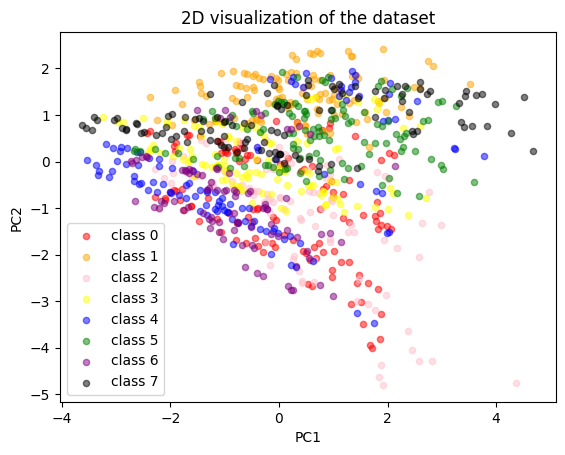

In [12]:
# introduce PCA (wiki link)
X_pca = PCA(n_components=2).fit_transform(X)
Plot2D(X_pca, Y)

## Task 1: Normalize features (2 points)

First complete the function `normalize` that performs min-max normalization on all the features. The formula of min-max normalization is $x' = \frac{x - \min(X)}{\max(X) - \min(X)}$

In [13]:
# export
def normalize(X):
    '''
    X: n*d matrix (np.array)
    '''
    ##########################################################
    # TODO: Implement min-max normalization on X
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    # Compute normalized values
    X_normed = (X - X_min) / (X_max - X_min)
    ##########################################################
    return X_normed


In [14]:
X_normed = normalize(X)
print(X_normed.shape)

(880, 77)


Use PCA to visualize the normalized features. Check the difference before and after normalization.

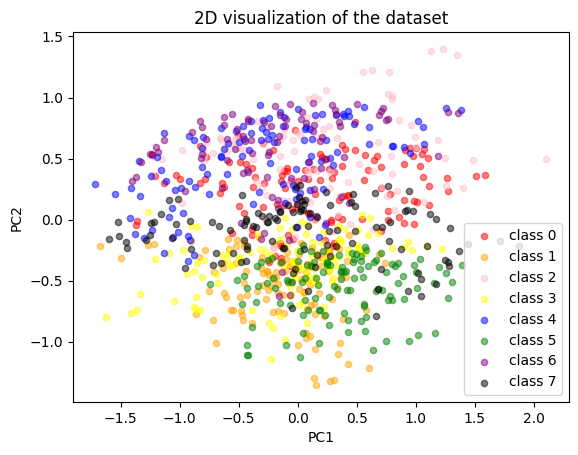

In [15]:
X_normed_pca = PCA(n_components=2).fit_transform(X_normed)
Plot2D(X_normed_pca, Y)

## Task 2: Train an MLP model in PyTorch

In the following, you need to complete the functions regarding the training and inference of an MLP model in PyTorch. Fill in all the `TODO` blocks according to the instructions.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_normed, Y, test_size=0.2, random_state=0)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}')

X_train: (704, 77), y_train: (704,), X_val: (176, 77), y_val: (176,)


### 2.1 Forward function of MLP (3 point)

In [17]:
# export
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import DataLoader, TensorDataset

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        ##########################################################
        # TODO: Implement the forward function
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        ##########################################################
        return out

In [18]:
def evaluate(model, val_loader, criterion, device):
    model.eval()
    total_loss = []
    total_correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            total += labels.size(0)
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss.append(loss.item())
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
    total_loss = np.mean(total_loss).item()
    acc = total_correct / total
    model.train()
    return total_loss, acc

### 2.2 Backpropogation in PyTorch

In [19]:
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_loss = []
    val_loss = []
    val_acc = []
    for epoch in range(num_epochs):
        model.train()
        total_loss = []
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            ##########################################################
            # TODO: backward propagation, check pytorch documentation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            ##########################################################
            total_loss.append(loss.item())
        total_loss = np.mean(total_loss).item()
        train_loss.append(total_loss)
        val_loss_, val_acc_ = evaluate(model, val_loader, criterion, device)
        val_loss.append(val_loss_)
        val_acc.append(val_acc_)
        print(f'Epoch {epoch + 1}/{num_epochs}, train_loss: {total_loss:.4f}, val_loss: {val_loss_:.4f}, val_acc: {val_acc_:.4f}')
    return train_loss, val_loss, val_acc

The following cell contains the construction of pytorch dataset and dataloader, the model, loss function, as well as the optimizer. The training involves several hyperparameters, including the batch size, learning rate (`lr`), number of training epochs (`num_epoch`), hidden dimensions of the MLP (`hidden_dim`). You can also modify the number of linear layers of the MLP model. The hyperparameters are critical to the performance of the model. Therefore it is important to tune and find a good combination of hyperparameters. This is where the validation set is used. You can utilize the validation accuracy as the metric for hyperparameter tuning. Note that the default hyperparameters may not be very good choices, so you need to carefully select them to get better performance.

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

batch_size = 30 # hyperparameter
trainset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
valset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(valset, batch_size=batch_size, shuffle=False)


input_dim = X_train.shape[1]
hidden_dim = 500 * input_dim # hyperparameter
output_dim = int(np.max(Y) + 1)
print(f'input_dim: {input_dim}, hidden_dim: {hidden_dim}, output_dim: {output_dim}')

model = MLP(input_dim, hidden_dim, output_dim)
model.to(device)

lr = 0.05 # hyperparameter
num_epochs = 500 # hyperparameter
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=lr)

train_loss, val_loss, val_acc = train(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs, device=device)
# add a function plotting the training loss vs. epoch, address the importance of num epochs
print(f'MLP accuracy: {val_acc[-1]}')

input_dim: 77, hidden_dim: 38500, output_dim: 8
Epoch 1/500, train_loss: 11.7930, val_loss: 7.6393, val_acc: 0.2273
Epoch 2/500, train_loss: 5.4348, val_loss: 4.5607, val_acc: 0.4602
Epoch 3/500, train_loss: 1.4797, val_loss: 1.5174, val_acc: 0.5568
Epoch 4/500, train_loss: 1.2715, val_loss: 0.7646, val_acc: 0.7443
Epoch 5/500, train_loss: 0.4725, val_loss: 0.6033, val_acc: 0.7614
Epoch 6/500, train_loss: 0.4654, val_loss: 0.3954, val_acc: 0.8750
Epoch 7/500, train_loss: 0.3153, val_loss: 0.4007, val_acc: 0.8693
Epoch 8/500, train_loss: 0.2612, val_loss: 0.4068, val_acc: 0.8466
Epoch 9/500, train_loss: 0.2534, val_loss: 0.4415, val_acc: 0.8523
Epoch 10/500, train_loss: 0.2659, val_loss: 0.2676, val_acc: 0.9261
Epoch 11/500, train_loss: 0.1999, val_loss: 0.3485, val_acc: 0.8580
Epoch 12/500, train_loss: 0.1931, val_loss: 0.1985, val_acc: 0.9659
Epoch 13/500, train_loss: 0.1916, val_loss: 0.3130, val_acc: 0.8977
Epoch 14/500, train_loss: 0.1684, val_loss: 0.2325, val_acc: 0.9375
Epoch 15

### 2.3 Making predictions on the test set (6 points)
After training, we can utilize the model to make predictions on the test set and save the prediction results. We will evaluate your predictions with the ground truth labels using the test accuracy (percentage of correct predicted test samples). Grading metric:
- 6 points: accuracy >= 0.85
- 5 points: accuracy >= 0.75
- 4 points: accuracy >= 0.7
- 3 points: accuracy >= 0.65
- 0 points: accuracy < 0.65

In [21]:
def predict(model, test_loader, device):
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs in test_loader:
            inputs = inputs[0].to(device)
            ##########################################################
            # TODO: Implement the prediction function, store the predicted classes in the `predictions` list
            outputs = model(inputs)
            predictions += outputs.argmax(dim=1).cpu().tolist()
            ##########################################################
    return predictions


In [22]:
df_test = pd.read_csv('cls_test.csv')
X_test = df_test.iloc[:,0:77]
X_test = X_test.fillna(X_test.mean(), inplace=False)
X_test = X_test.to_numpy()
X_test_normed = normalize(X_test)
testset = TensorDataset(torch.tensor(X_test_normed, dtype=torch.float32))
test_loader = DataLoader(testset, batch_size=32, shuffle=False)

predictions = predict(model, test_loader, device)
np.savetxt('cls_pred.csv', predictions, fmt='%d', delimiter=',')

## Task 3: sklearn classification models

In the above you implemented a PyTorch MLP classifier. sklearn provides many commonly used classification models. In the following, you will complete the training and predicting code for three sklearn classifiers and save the predictions on the test set. There are also several hyperparameters in the sklearn models that influence the performance. We recommend you to refer to sklearn's documentations on the three models: [Random Forest](https://scikit-learn.org/1.6/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [SVM](https://scikit-learn.org/1.6/modules/generated/sklearn.svm.SVC.html), and [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

### 3.1 Random Forest (3 points)
We will evaluate your predictions with the ground truth labels using the test accuracy (percentage of correct predicted test samples). Grading metric:
- 3 points: accuracy >= 0.8
- 2 points: accuracy >= 0.7
- 0 points: accuracy < 0.7

In [23]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators: number of trees in the forest, an important hyperparameter
random_forest_predictor = RandomForestClassifier(n_estimators=20, random_state=0)
##########################################################
# TODO: Train the random forest predictor and evaluate on the validation set
random_forest_predictor.fit(X_train, y_train)
y_pred = random_forest_predictor.predict(X_val)
##########################################################
accuracy = np.mean(y_pred == y_val)
print(f'Random Forest accuracy: {accuracy}')
predictions = random_forest_predictor.predict(X_test_normed)
np.savetxt('cls_pred_rf.csv', predictions, fmt='%d', delimiter=',')

Random Forest accuracy: 0.9375


### 3.2 SVM (3 points)
We will evaluate your predictions with the ground truth labels using the test accuracy (percentage of correct predicted test samples). Grading metric:
- 3 points: accuracy >= 0.8
- 2 points: accuracy >= 0.7
- 0 points: accuracy < 0.7

In [31]:
from sklearn.svm import SVC

svm_predictor = SVC(kernel='linear', C=10, random_state=0)
##########################################################
# TODO: Train the SVM predictor and evaluate on the validation set
svm_predictor.fit(X_train, y_train)
y_pred = svm_predictor.predict(X_val)
##########################################################
accuracy = np.mean(y_pred == y_val)
print(f'SVM accuracy: {accuracy}')
predictions = svm_predictor.predict(X_test_normed)
np.savetxt('cls_pred_svm.csv', predictions, fmt='%d', delimiter=',')

SVM accuracy: 1.0


### 3.3 Logistic Regression (3 points)
We will evaluate your predictions with the ground truth labels using the test accuracy (percentage of correct predicted test samples). Grading metric:
- 3 points: accuracy >= 0.8
- 2 points: accuracy >= 0.7
- 0 points: accuracy < 0.7

In [32]:
from sklearn.linear_model import LogisticRegression

lr_predictor = LogisticRegression(C=45, max_iter = 200, random_state=0)
##########################################################
# TODO: Train the logistic regression predictor and evaluate on the validation set
lr_predictor.fit(X_train, y_train)
y_pred = lr_predictor.predict(X_val)
##########################################################
accuracy = np.mean(y_pred == y_val)
print(f'Logistic Regression accuracy: {accuracy}')
predictions = lr_predictor.predict(X_test_normed)
np.savetxt('cls_pred_lr.csv', predictions, fmt='%d', delimiter=',')

Logistic Regression accuracy: 0.9886363636363636


## Submission

After completing all the tasks, run all the cells in this notebook to generate the prediction files. You need to submit five files to Gradescope for grading:

1. `hw2_classification.ipynb`, the notebook file with all the TODO blocks completed.
2. `cls_pred.csv`, the predictions made by the MLP model.
3. `cls_pred_rf.csv`, the predictions made by the random forest model.
4. `cls_pred_svm.csv`, the predictions made by the SVM model.
5. `cls_pred_lr.csv`, the predictions made by the logistic regression model.

Please submit all five files individually to Gradescope (**NOT** in a zip file).

Note that the four prediction files are automatically saved after you run all the cells in the notebook. Do not modify the codes related to file saving and do not change the file names, as the files will be used for autograding.

Submit the above five files to Gradescope. Note that you should directly submit the files, **DO NOT** put them in a folder and submit the folder.